# Titanic Dataset

## Import Libraries and Create Dataframe

In [1]:
# We will need: pandas, matplotlib, numpy and seaborn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data for this dataframe is in titanic.csv
titanic = pd.read_csv('titanic.csv')

In [3]:
# Check the size of the titanic data
titanic.size

10692

In [4]:
# Check the shape of the titanic data
titanic.shape

(891, 12)

In [5]:
# Check the first five rows of the titanic data
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check info on the titanic data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Segmenting Data Within a Dataframe

In [11]:
# Grab the last name of each passenger in the titanic data
last_name = titanic['Name'].apply(lambda x: x.split(', ')[0])
titanic['Last Name'] = last_name

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [18]:
# What are the five most common last names?
top_five = titanic['Last Name'].value_counts().head()
top_five.index


Index(['Andersson', 'Sage', 'Goodwin', 'Skoog', 'Carter'], dtype='object')

Text(0, 0.5, 'Frequency')

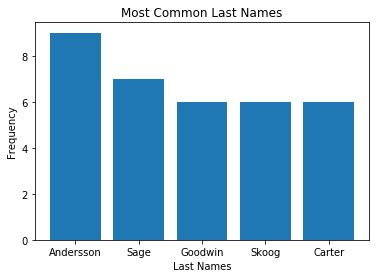

In [21]:
# Create a bar chart with the five most common last names
# Be sure to add a title and axis labels to your chart
plt.bar(top_five.index, top_five)
plt.title('Most Common Last Names')
plt.xlabel('Last Names')
plt.ylabel('Frequency')

## Distributions of Variables

In [23]:
# We want to look at the distribution of ages, but can't have nulls for that
# So, drop any row where Age is null from the dataframe
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Last Name        0
dtype: int64

In [25]:
titanic.dropna(subset=["Age"],inplace=True)

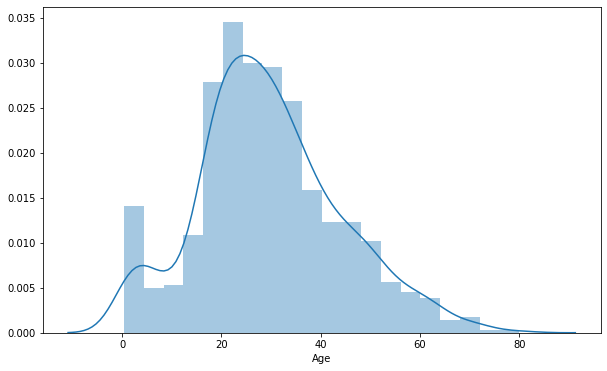

In [28]:
# Run this cell without changes
plt.figure(figsize=(10,6))
sns.distplot(titanic["Age"], kde=True)
plt.show()

In [27]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [30]:
titanic.Age.median()

28.0

Just by looking at this distribution, which would you expect:

    1) Mean is larger than median <---
    2) Mean and median are the same
    3) Median is larger than the mean

Why?

- mean is more heavily impacted by the outliers

## Grabbing Specific Rows to Answer Questions

In [34]:
# Who paid the most for a ticket, and how much did they pay?
max_fare=titanic.Fare.max()


In [35]:
titanic.loc[titanic['Fare']==max_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer


In [40]:
titanic.sort_values(by="Fare", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Fortune
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune


# Iris Dataset

## Create Dataframe

In [41]:
# The data for this dataframe is in iris.csv

iris = pd.read_csv('iris.csv')

In [42]:
# Check the size of the iris data
iris.size

750

In [44]:
# Check the shape of the iris data
iris.shape

(150, 5)

In [45]:
# Check the first five rows of the iris data
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
# Check info on the iris data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
# Check descriptive statistics on the iris data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Relationships Between Variables

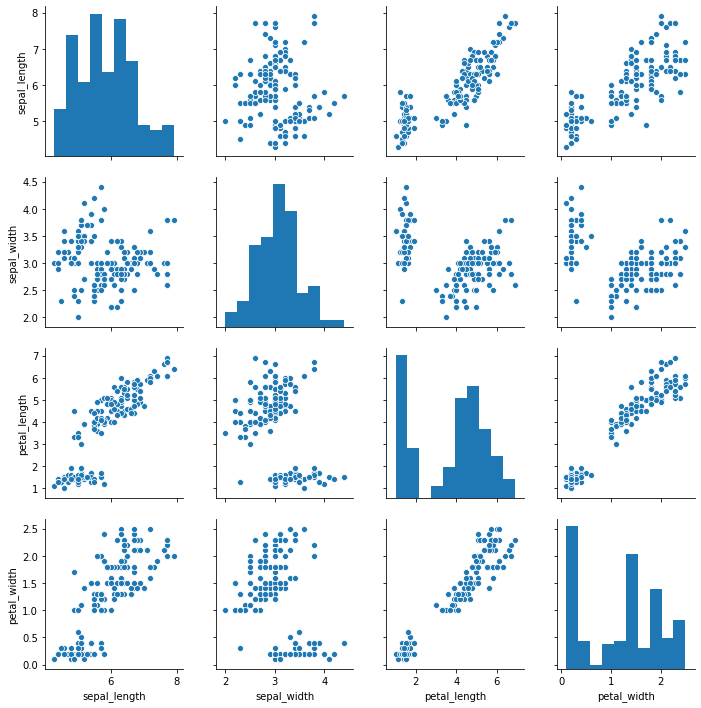

In [52]:
# Use Seaborn to plot comparisons between each variable in the iris data
sns.pairplot(iris)
plt.show()

Can you describe how some of these variables interact?

- Petal width and petal length are linearly related/correlated

## Transforming Columns

In [56]:
# These lengths/widths are given in centimeters - convert to inches
# Formula: cm / 2.54 = in

iris['sepal_length_in'] = iris["sepal_length"].apply(lambda x: x/2.54)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_in
0,5.1,3.5,1.4,0.2,setosa,2.007874
1,4.9,3.0,1.4,0.2,setosa,1.929134
2,4.7,3.2,1.3,0.2,setosa,1.850394
3,4.6,3.1,1.5,0.2,setosa,1.811024
4,5.0,3.6,1.4,0.2,setosa,1.968504


In [58]:
iris['sepal_width_in'] = iris["sepal_width"].apply(lambda x: x/2.54)
iris['petal_length_in'] = iris["petal_length"].apply(lambda x: x/2.54)
iris['petal_width_in'] = iris["petal_width"].apply(lambda x: x/2.54)

In [59]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_in,sepal_width_in,petal_length_in,petal_width_in
0,5.1,3.5,1.4,0.2,setosa,2.007874,1.377953,0.551181,0.07874
1,4.9,3.0,1.4,0.2,setosa,1.929134,1.181102,0.551181,0.07874
2,4.7,3.2,1.3,0.2,setosa,1.850394,1.259843,0.511811,0.07874
3,4.6,3.1,1.5,0.2,setosa,1.811024,1.220472,0.590551,0.07874
4,5.0,3.6,1.4,0.2,setosa,1.968504,1.417323,0.551181,0.07874


In [60]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_length_in', 'sepal_width_in', 'petal_length_in',
       'petal_width_in'],
      dtype='object')

In [61]:
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(lambda x: x/2.54)

,sepal_length,sepal_width,petal_length,petal_width
0,2.007874,1.377953,0.551181,0.078740
1,1.929134,1.181102,0.551181,0.078740
2,1.850394,1.259843,0.511811,0.078740
3,1.811024,1.220472,0.590551,0.078740
4,1.968504,1.417323,0.551181,0.078740
...,...,...,...,...
145,2.637795,1.181102,2.047244,0.905512
146,2.480315,0.984252,1.968504,0.748031
147,2.559055,1.181102,2.047244,0.787402
148,2.440945,1.338583,2.125984,0.905512


In [64]:
iris.iloc[:,:4].apply(lambda x: x/2.54)

,sepal_length,sepal_width,petal_length,petal_width
0,2.007874,1.377953,0.551181,0.078740
1,1.929134,1.181102,0.551181,0.078740
2,1.850394,1.259843,0.511811,0.078740
3,1.811024,1.220472,0.590551,0.078740
4,1.968504,1.417323,0.551181,0.078740
...,...,...,...,...
145,2.637795,1.181102,2.047244,0.905512
146,2.480315,0.984252,1.968504,0.748031
147,2.559055,1.181102,2.047244,0.787402
148,2.440945,1.338583,2.125984,0.905512


In [65]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_in,sepal_width_in,petal_length_in,petal_width_in
0,5.1,3.5,1.4,0.2,setosa,2.007874,1.377953,0.551181,0.078740
1,4.9,3.0,1.4,0.2,setosa,1.929134,1.181102,0.551181,0.078740
2,4.7,3.2,1.3,0.2,setosa,1.850394,1.259843,0.511811,0.078740
3,4.6,3.1,1.5,0.2,setosa,1.811024,1.220472,0.590551,0.078740
4,5.0,3.6,1.4,0.2,setosa,1.968504,1.417323,0.551181,0.078740
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.637795,1.181102,2.047244,0.905512
146,6.3,2.5,5.0,1.9,virginica,2.480315,0.984252,1.968504,0.748031
147,6.5,3.0,5.2,2.0,virginica,2.559055,1.181102,2.047244,0.787402
148,6.2,3.4,5.4,2.3,virginica,2.440945,1.338583,2.125984,0.905512
